**Medical Cost Personal Datasets Linear regression and ML**

Columns

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance

Acknowledgements
The dataset is available on GitHub [here.](https://github.com/stedy/Machine-Learning-with-R-datasets)

*Importing the necessary packages*

In [ ]:

import os

In [ ]:
import pandas as pd

#math
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

#regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#metrics
from sklearn import metrics

#crossval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#dimension increasing
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:

#load dataset
insurance = pd.read_csv("insurance.csv")
df = pd.DataFrame(insurance)



In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In this tutorial, the main purpouse is to predict the price of the insurance per gender, age as we also consider the Body mass index.


so let's check the missing value, and the duplicate in the dataset as part of data cleansing

In [ ]:
df.duplicated().sum()

1

There's only one duplicated in the dataset. let's removed it

In [ ]:
# dropping duplicate values
df.drop_duplicates(keep=False, inplace=True)

# length after removing duplicates
length = len(df)
length

1336

In [ ]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# New Section

Now after delete the duplited in the datafram, now the length of the dataframe is 1336 from 1338

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Now it's okay we don't have any missing..

**Some info :**

>  There are 1338 samples with 7 columns(dataframe).

As we can see, there are no missing values in our dataset.

But there was  duplicated sample, which we have deleted. (Now we have 1336 samples).




In [ ]:
df.describe()

,age,bmi,children,charges
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.237275,30.663507,1.096557,13287.833731
std,14.038678,6.102752,1.205650,12110.702320
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.272500,0.000000,4746.875675
50%,39.000000,30.380000,1.000000,9388.753650
75%,51.000000,34.700000,2.000000,16687.364100
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#outlier detaction

features = ['age','bmi','children','charges']

In [ ]:
index_list = []

for f in features :
    mean = df[f].mean()
    std = df[f].std()
    cutoff = std*3

    index = df[(df[f] < mean-cutoff) | (df[f] > mean+cutoff)].index
    index_list.extend(index)

In [ ]:
index_list = sorted(set(index_list))
print("number of outliers (using Standard Deviation) is : ", len(index_list))
print("outlier indexes (using Standard Deviation) is : ", index_list)

number of outliers (using Standard Deviation) is :  29
outlier indexes (using Standard Deviation) is :  [32, 34, 71, 116, 166, 413, 425, 438, 543, 568, 577, 640, 819, 847, 877, 932, 937, 969, 984, 1047, 1085, 1116, 1130, 1146, 1230, 1245, 1272, 1300, 1317]


##Viz all the  numerical column

In [ ]:
numerical_features = ['age', 'bmi', 'charges']

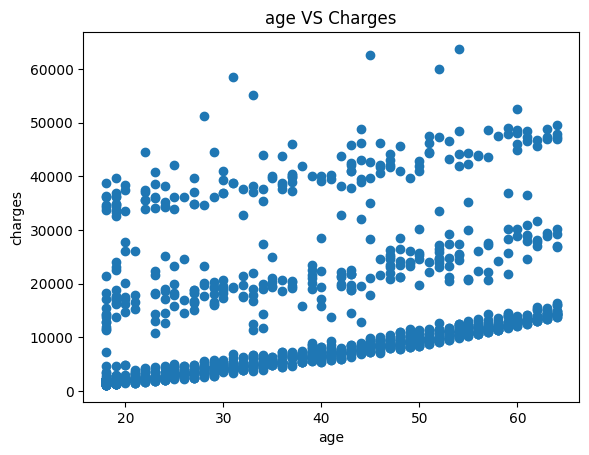

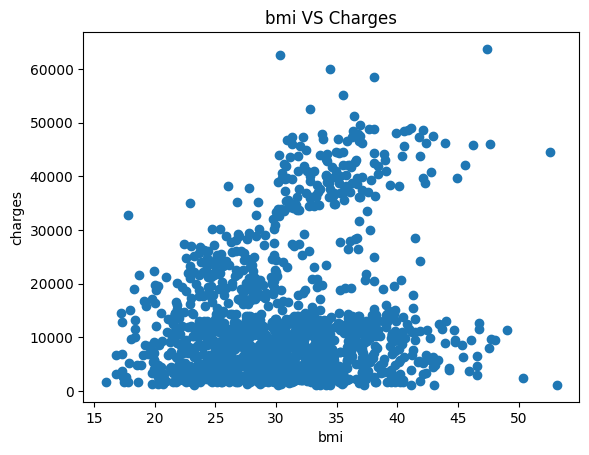

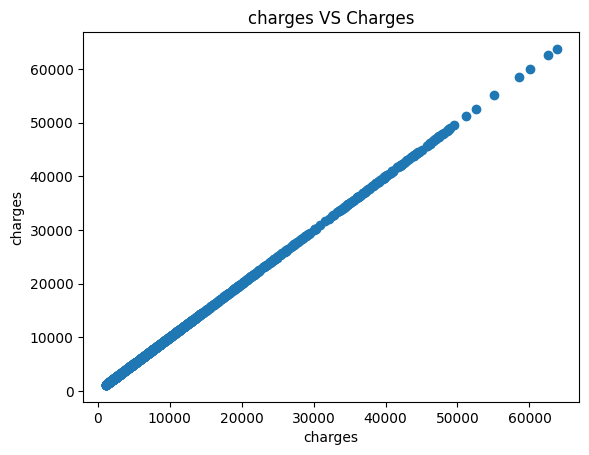

In [ ]:
#viz all the  numerical column

for n in numerical_features :
   plt.scatter(df[n], df['charges'])
   plt.title(f"{n} VS Charges")
   plt.xlabel(f"{n}")
   plt.ylabel("charges")
   plt.show()



In [ ]:
categorical_features = ["sex", "children", "smoker", "region"]

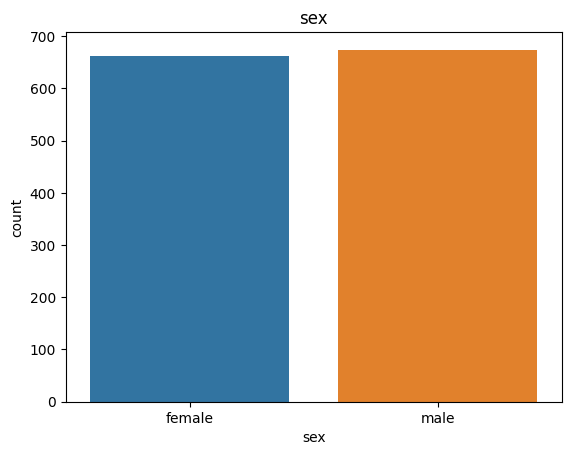

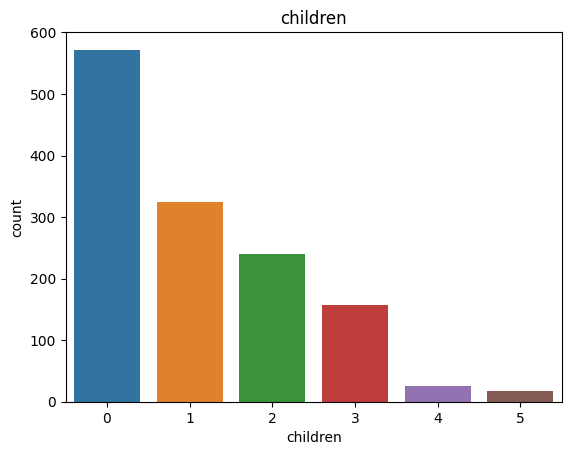

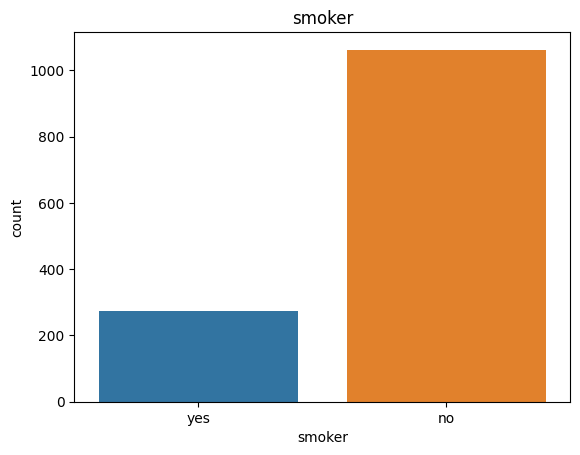

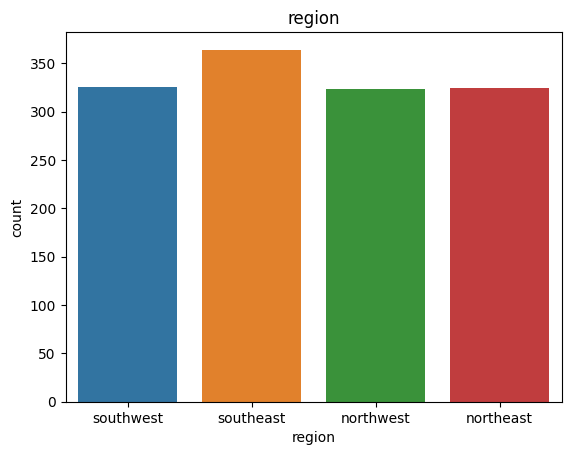

In [ ]:
#categoricals
for c in categorical_features :
    sns.countplot(data=df, x = df[c])
    plt.title(f"{c}")
    plt.show()

There are some outliers in our dataset. But it doesn't mean that they are false values or I should remove them. Also the number of samples are low.

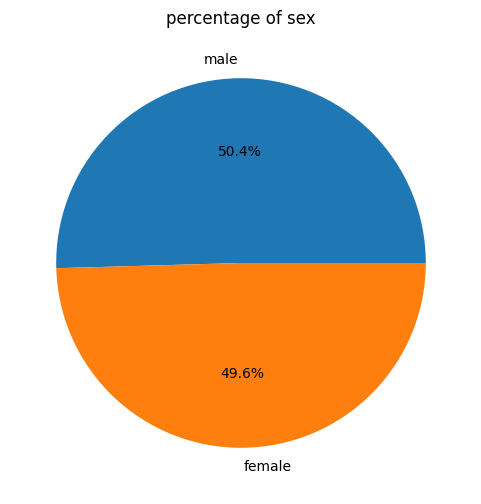

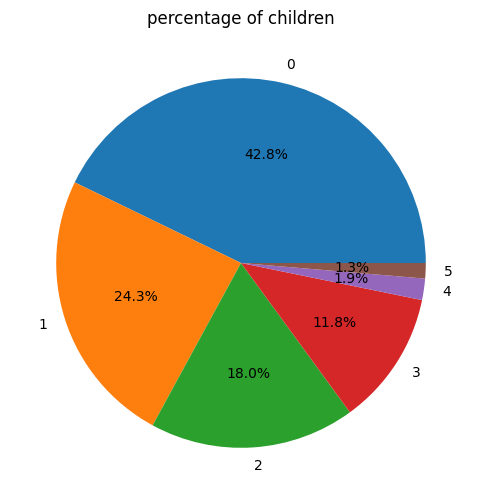

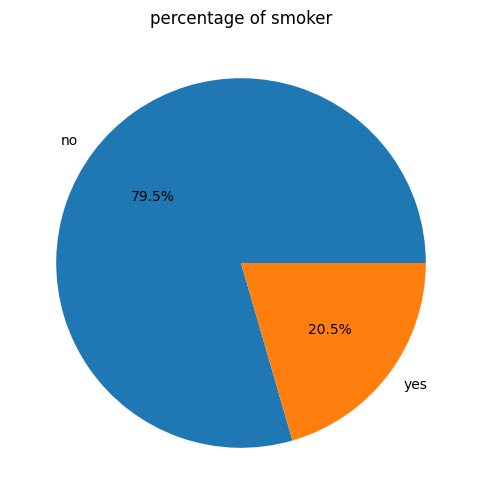

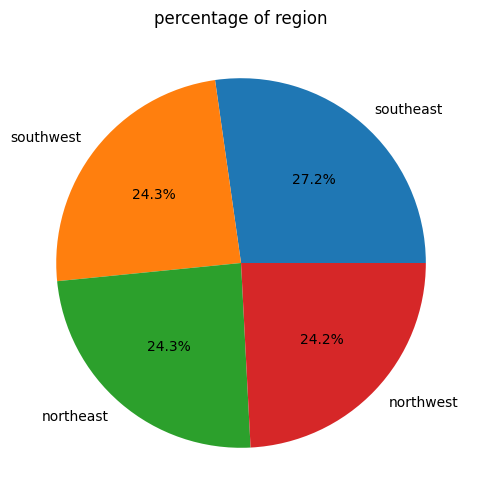

In [ ]:
for c in categorical_features :
    s = df[c].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'percentage of {c}')
    plt.show()

**Notes** :
1. In column 'sex', the number of male clients are more than female clients. (0.8% more)
2. In column 'children', 42.8% people do not have child and 24% with only 1 child the we have  18% with 2 childrens etc.. until 1.3% with 5 children.
3. In column 'smoker', 79.5% of clients are not smokers and only 20.5% smokes.
4. In column 'region', southeast is the hignest with 27.2% of custmers,  southeast and northeast has the same percentage of 24.3% then northwest 24.2%.

**Categorical features Encoding**

> Indented block
We'll all the colums to numerical value for ML Models.

1. Label Encoding : converting categorical features into numerical features.
2. One hot encoding : convert each categorical value into new categorical column and assign a binary value of 0 to 1 to them
3. Dummy variable trap : occurs when 2 or more dummy variables created by one hit encoding are highly correlated(multicolinear).





In [ ]:
categoricals = ['sex', 'smoker', 'region']

In [ ]:
df_1 = pd.get_dummies(df, columns=categoricals, drop_first=True)
df_1.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
#duplication check

df_1.duplicated().sum()

0

Nex we'll do correlation

<Axes: >

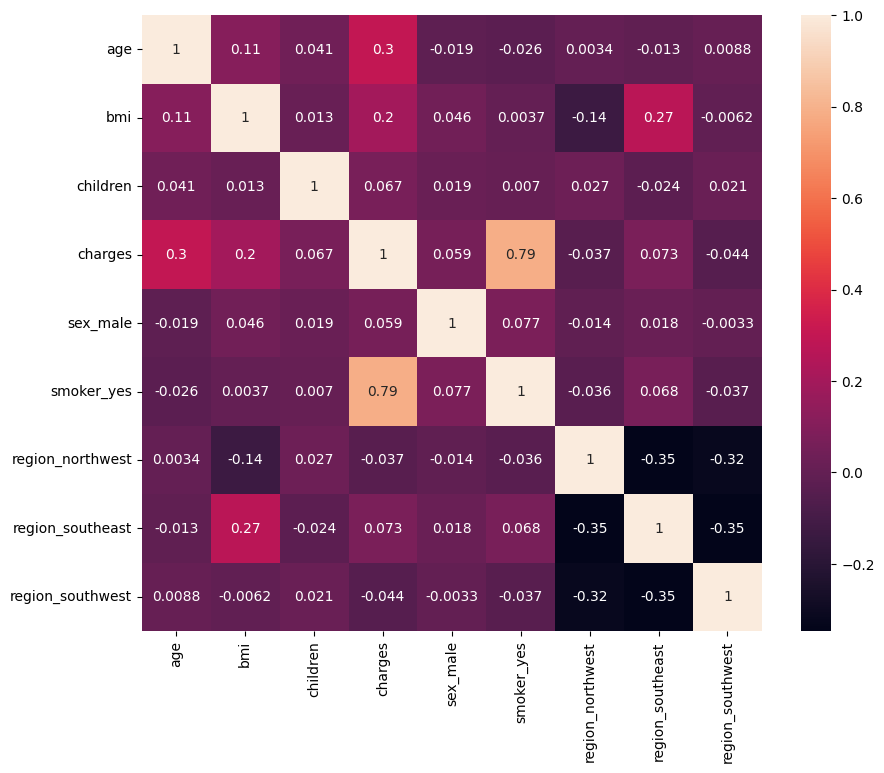

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(), annot= True)

**Notes** :
1. regions are  correlated with each other, so we have Multicollinearity.
2. charges is highly correlated with smoker_yes.

**LinearRegression**


>
Selecting X and Y



In [ ]:
x = pd.DataFrame(df_1, columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'])
y = df_1["charges"]



train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

LinearRegression Model

In [ ]:
reg = LinearRegression()
reg.fit(scaled_x_train, y_train)

LinearRegression()

In [ ]:
linear_intercept = reg.intercept_
linear_coef = reg.coef_

In [ ]:
for f,c in zip(x_train, linear_coef):
  print("coef of column", f, "is : ", c)

coef of column age is :  3645.0926320897493
coef of column bmi is :  1969.9890650798447
coef of column children is :  518.0433924129493
coef of column sex_male is :  6.819363439894019
coef of column smoker_yes is :  9612.462837035486
coef of column region_northwest is :  193.1041069974239
coef of column region_southeast is :  -309.40917998350096
coef of column region_southwest is :  -294.5555004077576


Predicting

In [ ]:
y_pred = reg.predict(scaled_x_test)

In [ ]:
linear_score = metrics.r2_score(y_test, y_pred)

metrix

In [ ]:
def Evaluation(x_test, y_test, model) :
  y_pred = model.predict(x_test)
  mse = metrics.mean_absolute_error(y_test, y_pred)
  msqe = metrics.mean_squared_error(y_test, y_pred)
  r2_score = metrics.r2_score(y_test, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

  print("mean_absolute_error : ", mse)
  print("mean_squared_error : ", msqe)
  print("root_mean_absolute_error : ", rmse)
  print("r2_score    : ", r2_score)



In [ ]:
Evaluation(scaled_x_test, y_test, reg)

mean_absolute_error :  4049.6490714794336
mean_squared_error :  34403896.892455645
root_mean_absolute_error :  5865.483517362882
r2_score    :  0.7694604452118156


In [ ]:
def compare(y_test, y_pred) :
  compare = pd.DataFrame()
  compare["Actual"] = y_test
  compare["Predict"] = y_pred
  compare["compare"] = abs(y_test - y_pred)

  return compare

In [ ]:
compare(y_test, y_pred)

,Actual,Predict,compare
254,41097.161750,35275.512136,5821.649614
427,7323.734819,1945.079116,5378.655703
1095,4561.188500,4383.306424,177.882076
1316,1731.677000,-1252.515768,2984.192768
1284,47403.880000,39370.284215,8033.595785
...,...,...,...
197,8516.829000,9081.217913,564.388913
432,5969.723000,6886.663421,916.940421
183,7419.477900,8384.983341,965.505441
1298,5261.469450,6689.246942,1427.777492


Text(0, 0.5, 'y_pred')

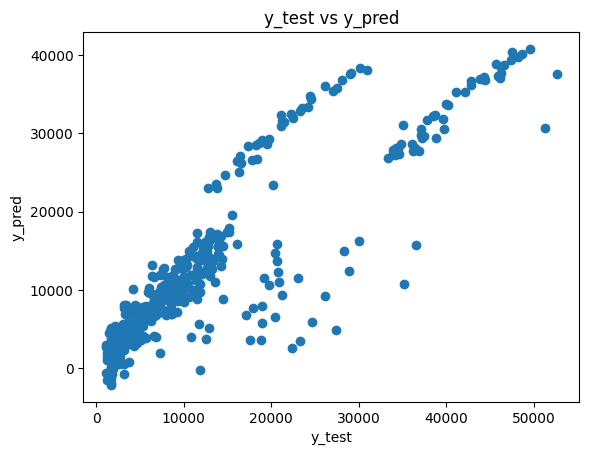

In [ ]:
plt.scatter(y_test, y_pred)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

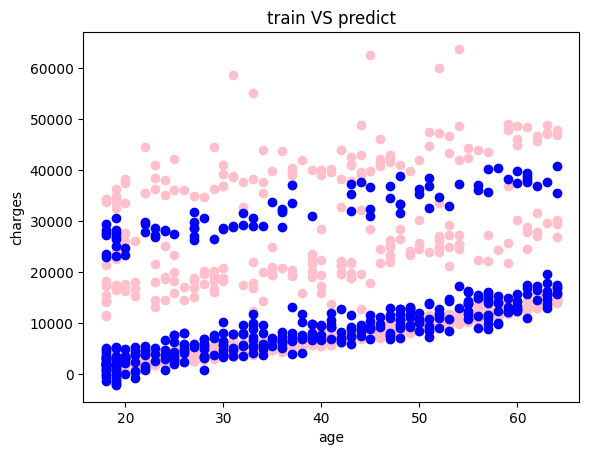

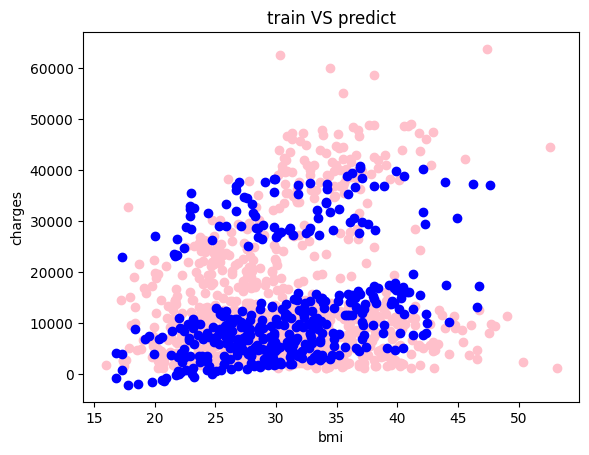

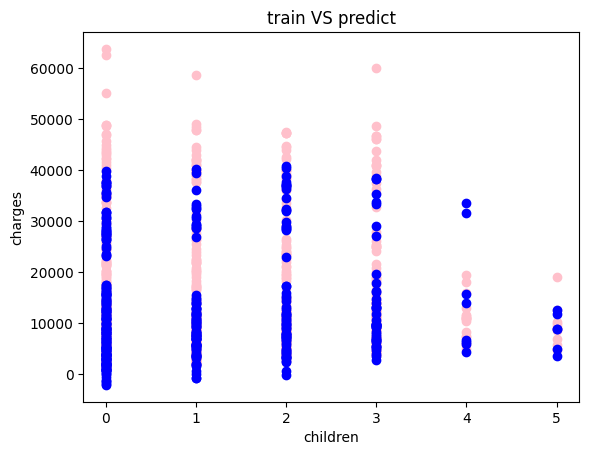

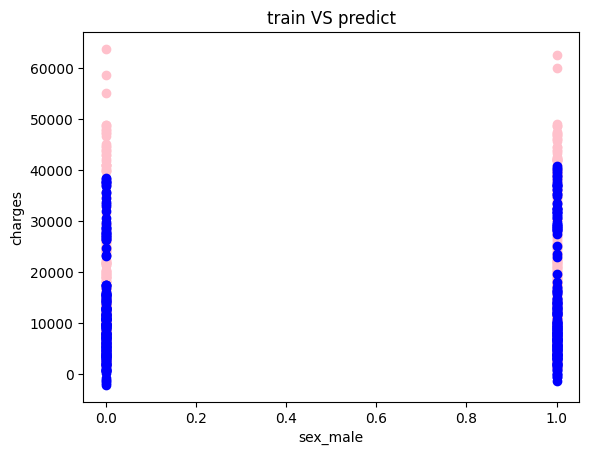

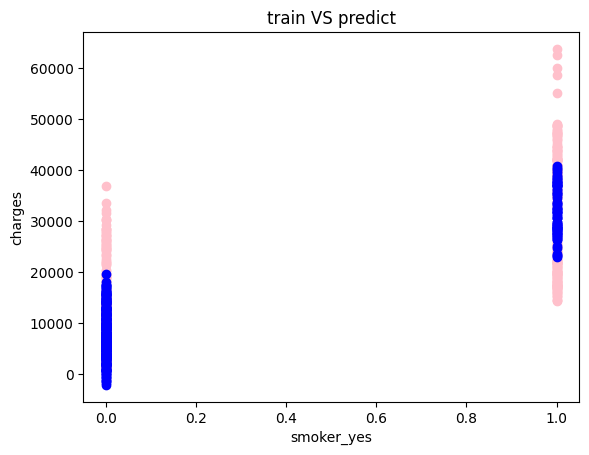

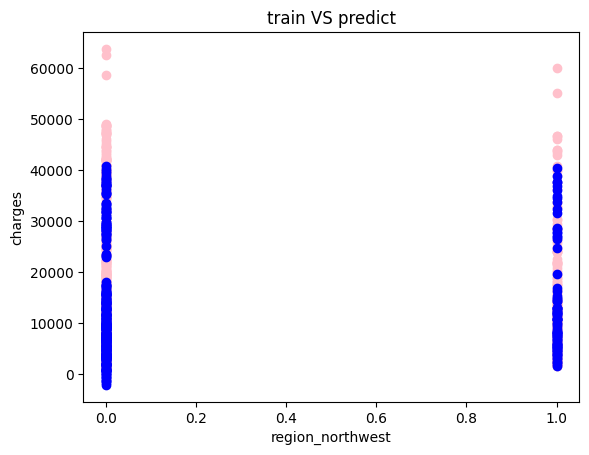

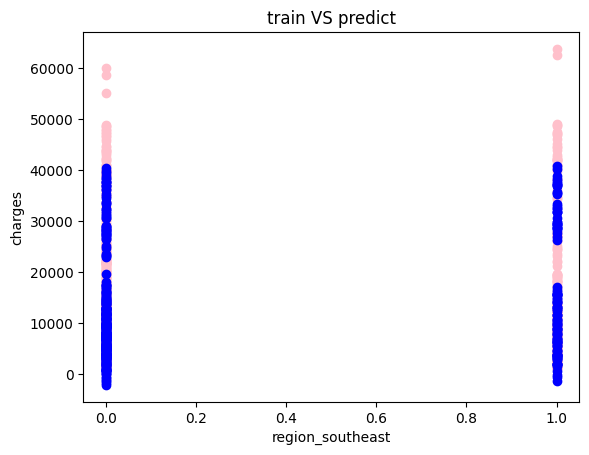

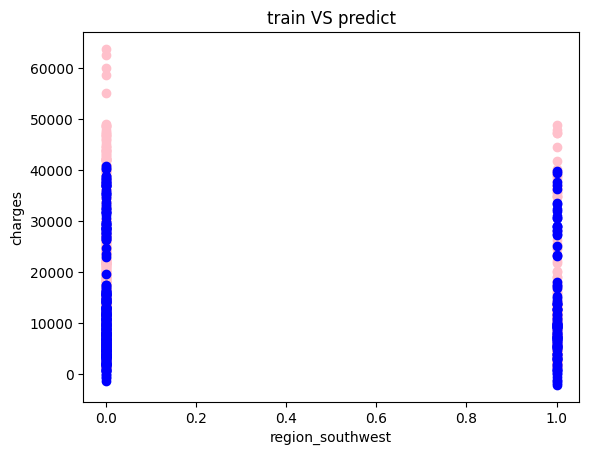

In [ ]:
for i in x_train.columns:
    plt.scatter(x_train[i], y_train, color="pink")
    plt.scatter(x_test[i], y_pred, color="blue")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()